In [235]:
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option("display.max_rows", 999)

In [236]:
customer_data = pd.read_csv("customer_master.csv")
customer_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [237]:
use_log_data = pd.read_csv("use_log.csv")
use_log_data.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [11]:
campaign_data = pd.read_csv("campaign_master.csv")
campaign_data.head()

,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [13]:
class_data = pd.read_csv("class_master.csv")
class_data.head()

,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [20]:
customer_join_data = pd.merge(customer_data, campaign_data, left_on="campaign_id", right_on="campaign_id", how="left")
customer_join_data.head()
customer_join_data = pd.merge(customer_join_data, class_data, left_on="class", right_on="class", how="left")
customer_join_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,通常,ナイト,6000


In [24]:
customer_join_data.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
campaign_name       0
class_name          0
price               0
dtype: int64

In [30]:
customer_join_data.groupby("class_name").count()["customer_id"]

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [34]:
customer_join_data.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [38]:
customer_join_data.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [42]:
customer_join_data.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [44]:
customer_join_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,通常,ナイト,6000


In [48]:
customer_join_data["customer_start"] = pd.to_datetime(customer_join_data["start_date"])
customer_join_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,customer_start
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2015-05-01
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2015-05-01
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2015-05-01
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2015-05-01
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,通常,ナイト,6000,2015-05-01


In [59]:
# 2018/04~の顧客を絞り込む
customer_join_data.sort_values("customer_start", ascending=False)
customer_join_data.loc[customer_join_data["customer_start"] > "2018-04-01"]

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,customer_start
2831,HI195873,XXX,C01,F,2018-04-02 00:00:00,2018-08-31 00:00:00,CA3,1,入会費無料,オールタイム,10500,2018-04-02
2832,TS322485,XX,C03,F,2018-04-02 00:00:00,2018-08-31 00:00:00,CA3,1,入会費無料,ナイト,6000,2018-04-02
2833,IK552971,XXXXX,C02,F,2018-04-02 00:00:00,2018-08-31 00:00:00,CA3,1,入会費無料,デイタイム,7500,2018-04-02
2834,PL000560,XXX,C01,M,2018-04-02 00:00:00,2018-07-31 00:00:00,CA3,1,入会費無料,オールタイム,10500,2018-04-02
2835,HD218970,XXXXX,C01,F,2018-04-02 00:00:00,2018-11-30 00:00:00,CA3,1,入会費無料,オールタイム,10500,2018-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2019-03-14
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2019-03-14
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,通常,ナイト,6000,2019-03-14
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2019-03-14


In [77]:
# 2018/04~まだ入会している顧客を絞り込む
is_started_customer_from_20180401 = customer_join_data["customer_start"] > "2018-04-01"
is_started_customer_from_20180401
is_still_exist_customer = customer_join_data["is_deleted"] == 0
is_still_exist_customer
still_customer = customer_join_data.loc[is_started_customer_from_20180401 & is_still_exist_customer]
still_customer.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     98
入会費無料    157
通常       461
Name: customer_id, dtype: int64

In [108]:
# 最新月で在籍していたユーザーのみで絞る
customer_join_data["customer_end"] = pd.to_datetime(customer_join_data["end_date"])
customer_join_data.head()
customer_newer = customer_join_data.loc[(customer_join_data["customer_end"] >= "2019-03-31") | (customer_join_data["customer_end"].isna())]
print(customer_newer.head())
print(len(customer_newer))

  customer_id   name class gender           start_date end_date campaign_id  \
0    OA832399   XXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
1    PL270116  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
2    OA974876  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
3    HD024127  XXXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
4    HD661448  XXXXX   C03      F  2015-05-01 00:00:00      NaN         CA1   

   is_deleted campaign_name class_name  price customer_start customer_end  
0           0            通常     オールタイム  10500     2015-05-01          NaT  
1           0            通常     オールタイム  10500     2015-05-01          NaT  
2           0            通常     オールタイム  10500     2015-05-01          NaT  
3           0            通常     オールタイム  10500     2015-05-01          NaT  
4           0            通常        ナイト   6000     2015-05-01          NaT  
2953


In [112]:
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

In [114]:
customer_newer.groupby("gender").count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

In [116]:
customer_newer.groupby("class_name").count()["customer_id"]

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

In [119]:
customer_newer["customer_end"].unique()

array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [121]:
# 利用履歴データから分析してみる
use_log_data.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [128]:
join_use_data = pd.merge(use_log_data, customer_join_data, left_on="customer_id", right_on="customer_id", how="left")
join_use_data.head()

,log_id,customer_id,usedate,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,customer_start,customer_end
0,L00000049012330,AS009373,2018-04-01,XX,C01,F,2015-11-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2015-11-01,NaT
1,L00000049012331,AS015315,2018-04-01,XXXXX,C01,M,2015-07-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2015-07-01,NaT
2,L00000049012332,AS040841,2018-04-01,XXXXX,C01,F,2017-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2017-05-01,NaT
3,L00000049012333,AS046594,2018-04-01,XXX,C01,M,2018-03-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2018-03-01,NaT
4,L00000049012334,AS073285,2018-04-01,XXXX,C01,M,2016-09-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2016-09-01,NaT


In [238]:
# 顧客毎、月ごとの利用回数
join_use_data["usedate"] = pd.to_datetime(join_use_data["usedate"])
join_use_data["usedate_month"] = join_use_data["usedate"].dt.strftime("%Y%m")
join_use_data.head()
join_use_data.groupby(["customer_id", "usedate_month"]).count()
pd.pivot_table(join_use_data, index="usedate_month", columns="customer_id", aggfunc="size", fill_value=0)

customer_id,AS002855,AS008805,AS009013,AS009373,AS015233,AS015315,AS015739,AS015746,AS019120,AS019860,AS024181,AS025956,AS029624,AS030404,AS030590,AS031206,AS036678,AS038564,AS040841,AS040860,AS046594,AS047907,AS055659,AS055680,AS057808,...,TS963437,TS964483,TS966353,TS969622,TS971314,TS972175,TS973306,TS974079,TS975153,TS977703,TS978415,TS979550,TS982240,TS982817,TS985617,TS989364,TS989482,TS993439,TS995238,TS995299,TS995853,TS998593,TS999079,TS999231,TS999855
usedate_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201804,4,0,2,3,0,6,7,4,0,6,4,0,0,1,0,4,7,6,8,6,9,3,7,3,8,...,8,0,10,8,0,6,4,9,7,8,0,0,3,7,0,3,6,0,0,4,0,0,7,6,6
201805,5,0,0,4,7,3,5,1,0,8,6,6,8,1,0,6,6,5,6,6,8,4,10,3,6,...,5,0,7,7,0,8,4,6,5,4,0,0,0,7,0,8,7,10,0,7,0,0,5,4,3
201806,5,8,0,4,7,3,6,2,0,6,4,6,5,0,0,5,8,4,4,8,8,5,10,3,2,...,4,9,2,6,0,8,2,7,3,7,0,0,0,6,0,8,4,3,0,2,0,0,6,1,6
201807,5,7,0,7,5,6,8,3,0,4,3,7,7,0,0,7,5,2,5,6,10,4,8,0,5,...,3,11,7,8,0,6,1,7,7,8,14,0,0,8,0,7,8,0,0,5,0,0,2,5,4
201808,3,5,0,6,11,3,5,3,8,7,8,7,5,0,0,6,6,2,5,5,6,4,9,0,5,...,7,8,7,6,0,3,0,5,7,8,10,0,0,5,0,7,6,0,0,7,0,0,3,3,3
201809,7,2,0,6,9,7,6,0,5,5,6,5,1,0,0,6,4,5,6,6,7,0,7,0,5,...,4,8,8,8,0,7,0,5,5,8,6,0,0,5,9,9,7,0,0,5,0,9,4,4,5
201810,3,2,0,5,7,4,5,0,3,7,5,4,4,0,0,5,6,5,4,7,7,0,5,0,5,...,5,8,3,7,0,5,0,5,8,8,8,7,0,8,8,9,2,0,0,4,0,9,6,5,4
201811,5,3,0,4,7,7,4,0,0,7,5,4,6,0,0,5,7,3,6,4,5,0,10,0,5,...,5,9,6,6,0,4,0,5,7,5,10,7,0,6,8,10,4,0,0,5,0,9,6,5,4
201812,2,5,0,4,9,5,4,0,0,5,6,1,5,0,0,5,5,3,10,5,7,0,5,0,5,...,4,6,3,6,7,6,0,5,5,7,6,10,0,6,9,6,3,0,8,4,0,7,9,8,5


In [155]:
uselog_month = join_use_data.groupby(["usedate_month", "customer_id"], as_index=False).count()
uselog_month
uselog_month.rename(columns={"log_id": "count"}, inplace=True)
del uselog_month["usedate"] # usedateカラムを削除
uselog_month.head()

,usedate_month,customer_id,count,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,customer_start,customer_end
0,201804,AS002855,4,4,4,4,4,0,4,4,4,4,4,4,0
1,201804,AS009013,2,2,2,2,2,2,2,2,2,2,2,2,2
2,201804,AS009373,3,3,3,3,3,0,3,3,3,3,3,3,0
3,201804,AS015315,6,6,6,6,6,0,6,6,6,6,6,6,0
4,201804,AS015739,7,7,7,7,7,0,7,7,7,7,7,7,0


In [179]:
# 顧客毎の、利用回数平均・中央値・最大・最小を求める
use_log_customer = uselog_month.groupby("customer_id").agg(["mean", "median", "max", "min"])["count"]
use_log_customer = use_log_customer.reset_index(drop=False) # indexを振り直す。groupbyなどデータ結合、合成をするとindexが歯抜けになるので、0~indexを振り直すときに使う
use_log_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [191]:
# TODO: ノック26
join_use_data.head()
join_use_data["weekday"] = join_use_data["usedate"].dt.weekday
join_use_data.head()

,log_id,customer_id,usedate,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,customer_start,customer_end,usedate_month,weekday
0,L00000049012330,AS009373,2018-04-01,XX,C01,F,2015-11-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2015-11-01,NaT,201804,6
1,L00000049012331,AS015315,2018-04-01,XXXXX,C01,M,2015-07-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2015-07-01,NaT,201804,6
2,L00000049012332,AS040841,2018-04-01,XXXXX,C01,F,2017-05-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2017-05-01,NaT,201804,6
3,L00000049012333,AS046594,2018-04-01,XXX,C01,M,2018-03-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2018-03-01,NaT,201804,6
4,L00000049012334,AS073285,2018-04-01,XXXX,C01,M,2016-09-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2016-09-01,NaT,201804,6


In [243]:
# join_use_data.groupby(["customer_id", "usedate_month", "weekday"], as_index=False).count() # asIndex=Trueの場合、groupbyで指定したkeyがindexになってしまうので、asIndex=Falseにする
weekday_data = join_use_data.groupby(["customer_id", "usedate_month", "weekday"], as_index=False).count()[["customer_id", "usedate_month", "weekday", "log_id"]]
weekday_data.head()
weekday_data.rename(columns={"log_id": "count"}, inplace=True)
weekday_data.head()

,customer_id,usedate_month,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [261]:
# 顧客毎の各月の最大値を求める
weekday_data = weekday_data.groupby(["customer_id"], as_index=False).max()[["customer_id", "count"]] # max()を適応すると、各列毎の最大値が取得されるので注意すること
weekday_data.head()
weekday_data["routine_flg"] = 0
weekday_data["routine_flg"] = weekday_data["routine_flg"].where(weekday_data["count"] < 4, 1) # whereは()は、Trueの場合は要素はそのまま、Falseの場合は第二引数で指定した要素に入れ替える
weekday_data.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [270]:
weekday_customer_join_data = pd.merge(weekday_data[["customer_id", "routine_flg"]], customer_join_data, left_on="customer_id", right_on="customer_id", how="left")
weekday_customer_join_data.head()

,customer_id,routine_flg,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,customer_start,customer_end
0,AS002855,1,XXXX,C03,F,2016-11-01 00:00:00,NaN,CA1,0,通常,ナイト,6000,2016-11-01,NaT
1,AS008805,1,XXXXX,C01,M,2018-06-07 00:00:00,2019-03-31 00:00:00,CA2,1,入会費半額,オールタイム,10500,2018-06-07,2019-03-31
2,AS009013,0,XXXXX,C03,M,2017-08-01 00:00:00,2018-04-30 00:00:00,CA2,1,入会費半額,ナイト,6000,2017-08-01,2018-04-30
3,AS009373,1,XX,C01,F,2015-11-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2015-11-01,NaT
4,AS015233,1,XXXXX,C01,M,2018-05-13 00:00:00,NaN,CA2,0,入会費半額,オールタイム,10500,2018-05-13,NaT


In [292]:
customer_join = pd.merge(weekday_customer_join_data, use_log_customer, left_on="customer_id", right_on="customer_id", how="left")
customer_join.head()

,customer_id,routine_flg,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,customer_start,customer_end,mean,median,max,min
0,AS002855,1,XXXX,C03,F,2016-11-01 00:00:00,NaN,CA1,0,通常,ナイト,6000,2016-11-01,NaT,4.500000,5.0,7,2
1,AS008805,1,XXXXX,C01,M,2018-06-07 00:00:00,2019-03-31 00:00:00,CA2,1,入会費半額,オールタイム,10500,2018-06-07,2019-03-31,4.000000,4.0,8,1
2,AS009013,0,XXXXX,C03,M,2017-08-01 00:00:00,2018-04-30 00:00:00,CA2,1,入会費半額,ナイト,6000,2017-08-01,2018-04-30,2.000000,2.0,2,2
3,AS009373,1,XX,C01,F,2015-11-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2015-11-01,NaT,5.083333,5.0,7,3
4,AS015233,1,XXXXX,C01,M,2018-05-13 00:00:00,NaN,CA2,0,入会費半額,オールタイム,10500,2018-05-13,NaT,7.545455,7.0,11,4


In [290]:
customer_join.isnull().sum()

customer_id         0
routine_flg         0
name                0
class               0
gender              0
start_date          0
end_date            0
campaign_id         0
is_deleted          0
campaign_name       0
class_name          0
price               0
customer_start      0
customer_end        0
mean                0
median              0
max                 0
min                 0
tmp_customer_end    0
dtype: int64

In [328]:
from dateutil.relativedelta import relativedelta
customer_join["tmp_customer_end"] = customer_join["customer_end"]
customer_join["tmp_customer_end"] = customer_join["tmp_customer_end"].fillna(pd.to_datetime("2019-04-30"))
customer_join["membership_period"] = 0
for i in range(len(customer_join)):
    # iloc[index]で、indexでdataframeの各データを取得できる
    delta = relativedelta(customer_join["tmp_customer_end"].iloc[i], customer_join["customer_start"].iloc[i])
    customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months

customer_join

,customer_id,routine_flg,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,customer_start,customer_end,mean,median,max,min,tmp_customer_end,membership_period
0,AS002855,1,XXXX,C03,F,2016-11-01 00:00:00,NaN,CA1,0,通常,ナイト,6000,2016-11-01,NaT,4.500000,5.0,7,2,2019-04-30,29
1,AS008805,1,XXXXX,C01,M,2018-06-07 00:00:00,2019-03-31 00:00:00,CA2,1,入会費半額,オールタイム,10500,2018-06-07,2019-03-31,4.000000,4.0,8,1,2019-03-31,9
2,AS009013,0,XXXXX,C03,M,2017-08-01 00:00:00,2018-04-30 00:00:00,CA2,1,入会費半額,ナイト,6000,2017-08-01,2018-04-30,2.000000,2.0,2,2,2018-04-30,8
3,AS009373,1,XX,C01,F,2015-11-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2015-11-01,NaT,5.083333,5.0,7,3,2019-04-30,41
4,AS015233,1,XXXXX,C01,M,2018-05-13 00:00:00,NaN,CA2,0,入会費半額,オールタイム,10500,2018-05-13,NaT,7.545455,7.0,11,4,2019-04-30,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,TS995853,1,XXXX,C01,M,2019-02-08 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2019-02-08,NaT,9.500000,9.5,11,8,2019-04-30,2
4188,TS998593,1,XXXXX,C03,M,2018-09-01 00:00:00,NaN,CA1,0,通常,ナイト,6000,2018-09-01,NaT,8.142857,8.0,9,7,2019-04-30,7
4189,TS999079,1,XXX,C03,M,2016-06-01 00:00:00,NaN,CA1,0,通常,ナイト,6000,2016-06-01,NaT,4.916667,5.5,9,2,2019-04-30,34
4190,TS999231,1,XXXX,C01,M,2017-03-01 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2017-03-01,NaT,4.666667,5.0,8,1,2019-04-30,25


In [331]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [337]:
customer_join.groupby("routine_flg").count()[["customer_id"]]

,customer_id
routine_flg,
0,779
1,3413


(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

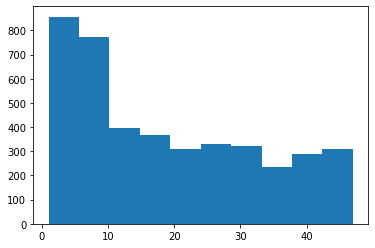

In [343]:
# 会員期間の分布を求める
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(customer_join["membership_period"])

In [353]:
# 10ヶ月以内に離れていくユーザーの特徴を掴む
under_10_customer_join = customer_join.loc[customer_join["membership_period"] < 10]
under_10_and_end_customer_join = under_10_customer_join.loc[under_10_customer_join["is_deleted"] == 1]
under_10_and_end_customer_join.head()

,customer_id,routine_flg,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,customer_start,customer_end,mean,median,max,min,tmp_customer_end,membership_period
1,AS008805,1,XXXXX,C01,M,2018-06-07 00:00:00,2019-03-31 00:00:00,CA2,1,入会費半額,オールタイム,10500,2018-06-07,2019-03-31,4.000000,4.0,8,1,2019-03-31,9
2,AS009013,0,XXXXX,C03,M,2017-08-01 00:00:00,2018-04-30 00:00:00,CA2,1,入会費半額,ナイト,6000,2017-08-01,2018-04-30,2.000000,2.0,2,2,2018-04-30,8
7,AS015746,0,XXXXX,C01,M,2017-12-01 00:00:00,2018-08-31 00:00:00,CA3,1,入会費無料,オールタイム,10500,2017-12-01,2018-08-31,2.600000,3.0,4,1,2018-08-31,8
8,AS019120,0,XXXX,C01,M,2018-08-07 00:00:00,2018-10-31 00:00:00,CA1,1,通常,オールタイム,10500,2018-08-07,2018-10-31,5.333333,5.0,8,3,2018-10-31,2
11,AS025956,1,XXXXXX,C01,M,2018-05-09 00:00:00,2019-02-28 00:00:00,CA2,1,入会費半額,オールタイム,10500,2018-05-09,2019-02-28,4.400000,4.5,7,1,2019-02-28,9


In [357]:
# 10ヶ月以内に退会したユーザー
under_10_and_end_customer_join.groupby(["class_name", "campaign_name"]).count()[["customer_id"]]

customer_id
class_name campaign_name             
オールタイム     入会費半額                  147
           入会費無料                  103
           通常                     189
デイタイム      入会費半額                   64
           入会費無料                   65
           通常                     109
ナイト        入会費半額                   71
           入会費無料                   56
           通常                     116

In [369]:
under_10_and_still_member_customer_join = customer_join.loc[(customer_join["membership_period"] < 10) & (customer_join["is_deleted"] == 0)]
under_10_and_still_member_customer_join.head()

,customer_id,routine_flg,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,customer_start,customer_end,mean,median,max,min,tmp_customer_end,membership_period
14,AS030590,0,XXX,C03,M,2019-03-08 00:00:00,NaN,CA1,0,通常,ナイト,6000,2019-03-08,NaT,12.000000,12.0,12,12,2019-04-30,1
28,AS065785,1,XXXXX,C02,F,2019-01-13 00:00:00,NaN,CA1,0,通常,デイタイム,7500,2019-01-13,NaT,8.333333,8.0,9,8,2019-04-30,3
37,AS076940,0,XXXXX,C01,F,2019-03-12 00:00:00,NaN,CA1,0,通常,オールタイム,10500,2019-03-12,NaT,7.000000,7.0,7,7,2019-04-30,1
44,AS093634,1,XXX,C03,M,2018-10-07 00:00:00,NaN,CA1,0,通常,ナイト,6000,2018-10-07,NaT,8.166667,8.0,10,7,2019-04-30,6
58,AS118198,1,XX,C03,M,2018-12-09 00:00:00,NaN,CA3,0,入会費無料,ナイト,6000,2018-12-09,NaT,8.750000,8.5,11,7,2019-04-30,4


In [370]:
# 10ヶ月以内で、またメンバーの人
under_10_and_still_member_customer_join.groupby(["class_name", "campaign_name"]).count()[["customer_id"]]

# 退会したユーザーとまたメンバーの比較を行うと、
# 通常入会したメンバーの方がよりメンバー維持していることが分かる
# キャンペーンは、一時的に入会メンバーを増やすが、継続しない傾向にある

customer_id
class_name campaign_name             
オールタイム     入会費無料                   66
           通常                     211
デイタイム      入会費無料                   26
           通常                     110
ナイト        入会費無料                   37
           通常                     140

In [373]:
under_10_and_end_customer_join.describe()

,routine_flg,is_deleted,price,mean,median,max,min,membership_period
count,920.000000,920.0,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,0.413043,1.0,8535.326087,4.113058,3.780435,6.983696,1.897826,5.317391
std,0.492648,0.0,1954.766475,1.275170,1.326120,2.545934,1.041258,2.500777
min,0.000000,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.0,6000.000000,3.333333,3.000000,5.000000,1.000000,3.000000
50%,0.000000,1.0,7500.000000,4.200000,4.000000,8.000000,2.000000,5.000000
75%,1.000000,1.0,10500.000000,4.878472,5.000000,9.000000,2.000000,8.000000
max,1.000000,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,9.000000


In [375]:
under_10_and_still_member_customer_join.describe()

,routine_flg,is_deleted,price,mean,median,max,min,membership_period
count,590.000000,590.0,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,0.923729,0.0,8458.474576,8.260367,8.253390,9.855932,6.659322,4.576271
std,0.265657,0.0,1997.125535,1.008933,1.079496,1.365817,1.577927,2.464026
min,0.000000,0.0,6000.000000,5.000000,5.000000,5.000000,1.000000,1.000000
25%,1.000000,0.0,6000.000000,7.666667,7.500000,9.000000,6.000000,3.000000
50%,1.000000,0.0,7500.000000,8.142857,8.000000,10.000000,7.000000,4.000000
75%,1.000000,0.0,10500.000000,8.750000,9.000000,11.000000,7.000000,7.000000
max,1.000000,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,9.000000


In [376]:
customer_join.to_csv("customer_join.csv", index=False)